In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [23]:
# Gravitational constant
G = 6.67430e-11  # m^3 kg^-1 s^-2

# Earth and satellite
mass_earth = 5.972e24  # kg
mass_satellite = 1000  # kg

# Initial conditions
position = np.array([7000e3, 0.0], dtype=float) # meters
velocity = np.array([0.0, 10000], dtype=float) # m/s. Make float so that we can add floats to it later


r = position
r_mag = np.linalg.norm(r)

In [24]:
total_time = 7000
dt = 0.01
steps = total_time / dt # define a "step" which is a stage that we compute a, v and r (lots of these)

#for each step, we will calculate the acceleration, then the new velocity, then the new position, then 
#add that position to an array with position and time (the step * 5). Also create array of velocity and time.
    

In [25]:
def net_accel(r, velocity, t):
    
    accel_gravity = -(G * mass_earth) * r/ r_mag**3 # defining acceleration, with r vector positive radially outwards
    return accel_gravity

In [26]:
positions = [position.copy()] # setting up list that will have all positions when appended
speeds = [np.linalg.norm(velocity)] # list of speed, magnitude of velocity
time = np.arange(0, steps * dt, dt)


for i in range(int(steps)): # turn steps into integer so it works with range
    velocity += net_accel(position, velocity, time[i]) * dt # written so that can go and add forces that depend on t and v later
    position += velocity * dt
    positions.append(position.copy())
    speeds.append(np.linalg.norm(velocity))
    
positions = np.array(positions)
speeds = np.array(speeds)
x_vals = positions[:, 0]
y_vals = positions[:, 1]


<IPython.core.display.Javascript object>


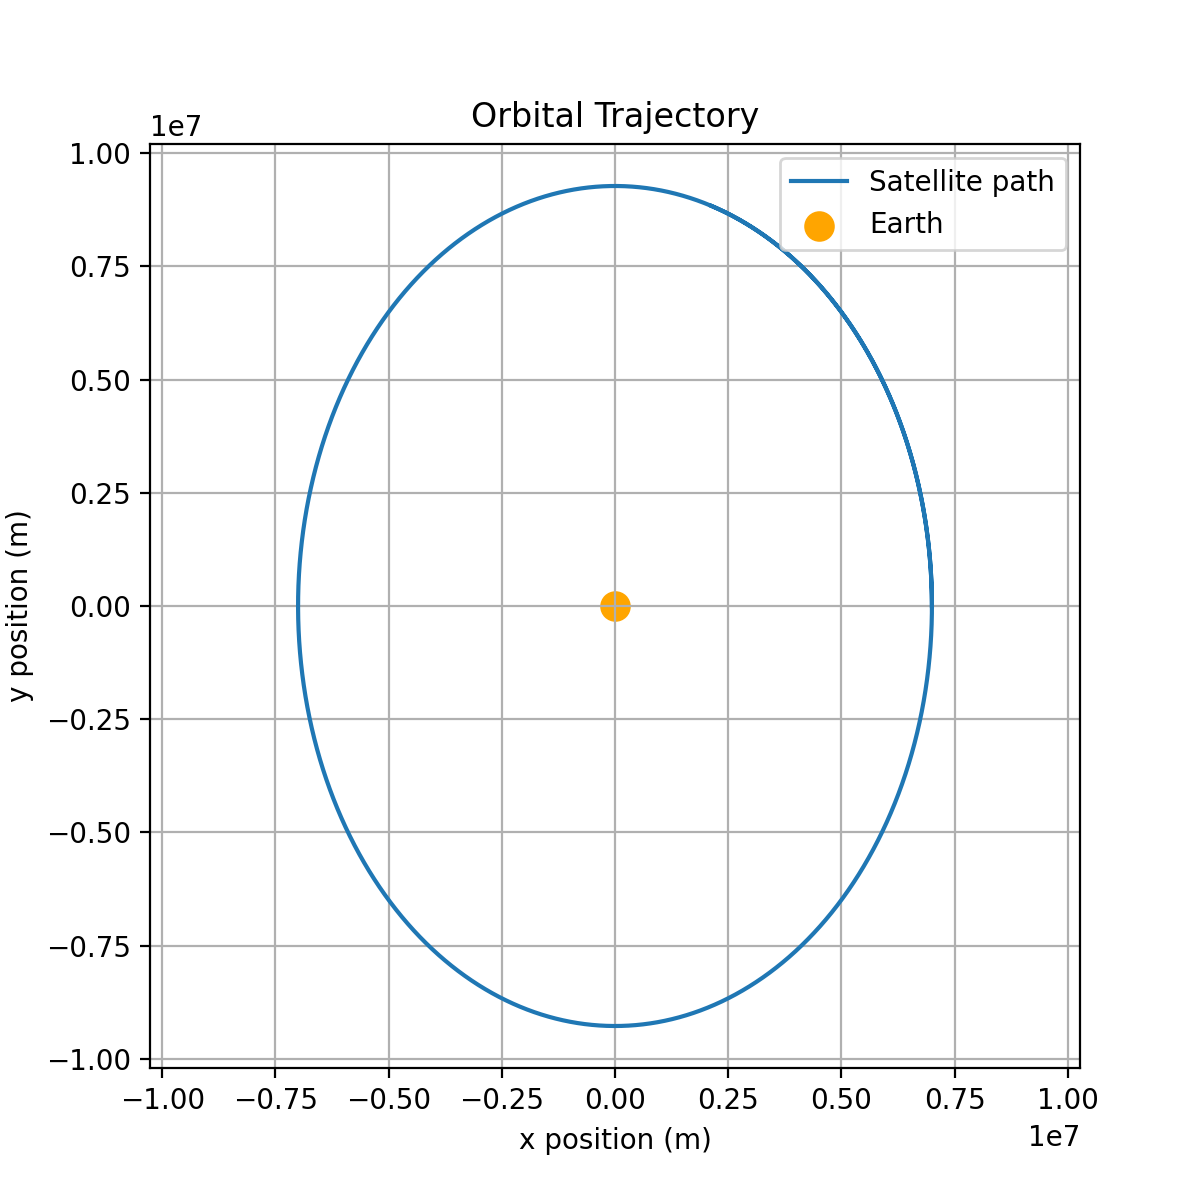

<IPython.core.display.Javascript object>


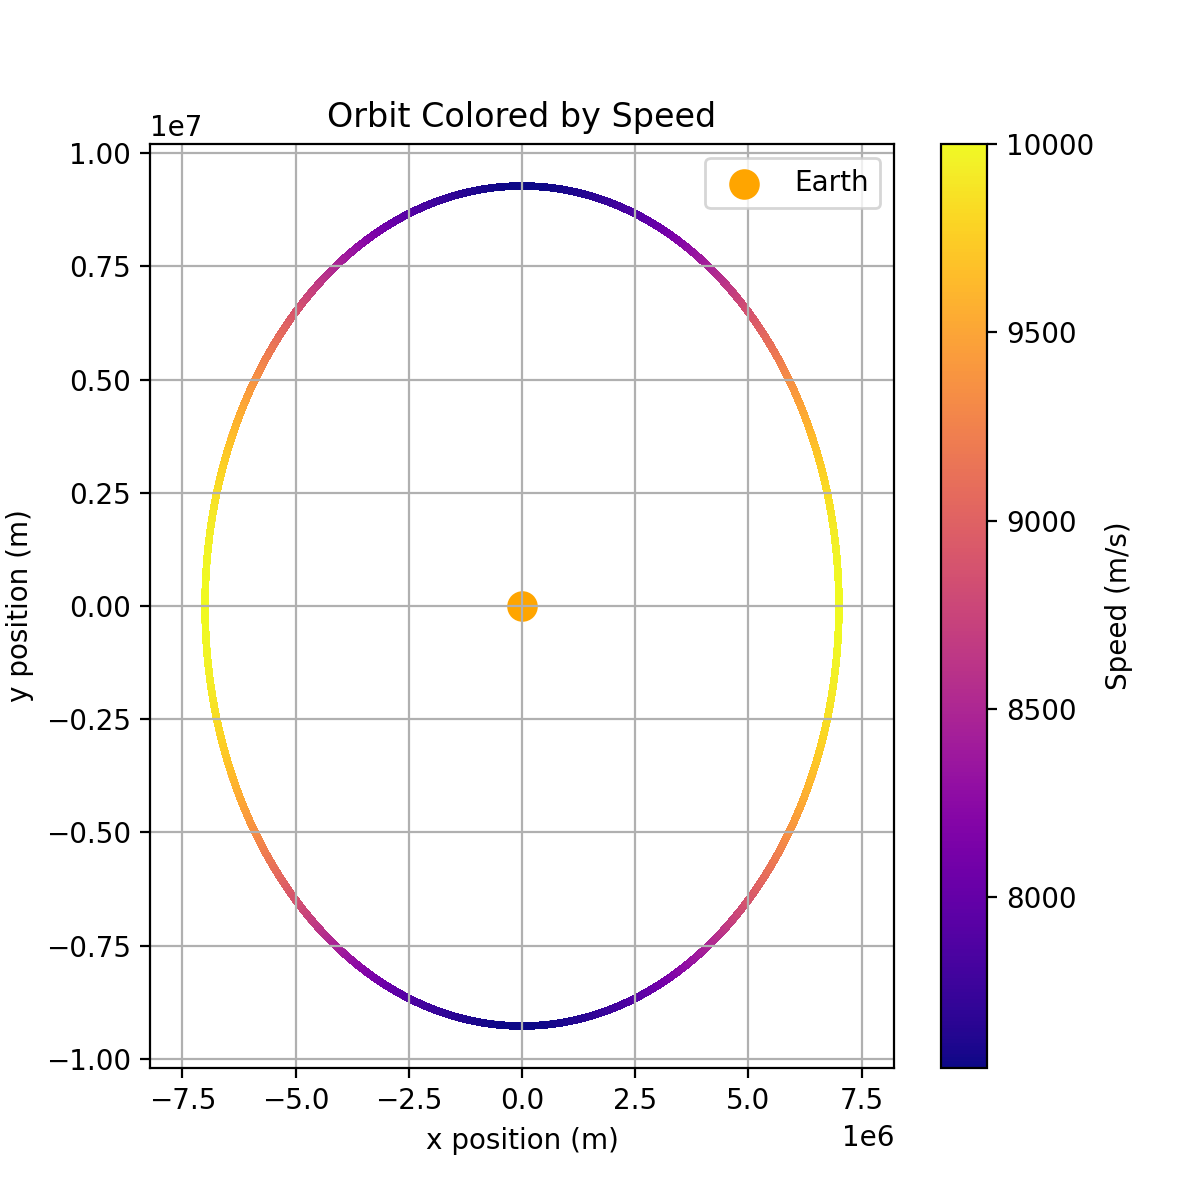

In [27]:
plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, label="Satellite path")
plt.scatter([0], [0], color='orange', s=100, label="Earth")  # Earth at origin
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.axis("equal")  # ensures the orbit isn't stretched
plt.grid(True)
plt.legend(loc = "upper right")
plt.title("Orbital Trajectory")
plt.show()

plt.figure(figsize=(6,6))
sc = plt.scatter(positions[:,0], positions[:,1], c=speeds, cmap='plasma', s=2)
plt.colorbar(sc, label='Speed (m/s)')
plt.scatter([0], [0], color='orange', s=100, label="Earth")
plt.axis('equal')
plt.grid(True)
plt.title("Orbit Colored by Speed")
plt.legend()
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.show()

# we expect a constant color as the setup is symmetrical. But Euler's method allows for some slight variation

<IPython.core.display.Javascript object>


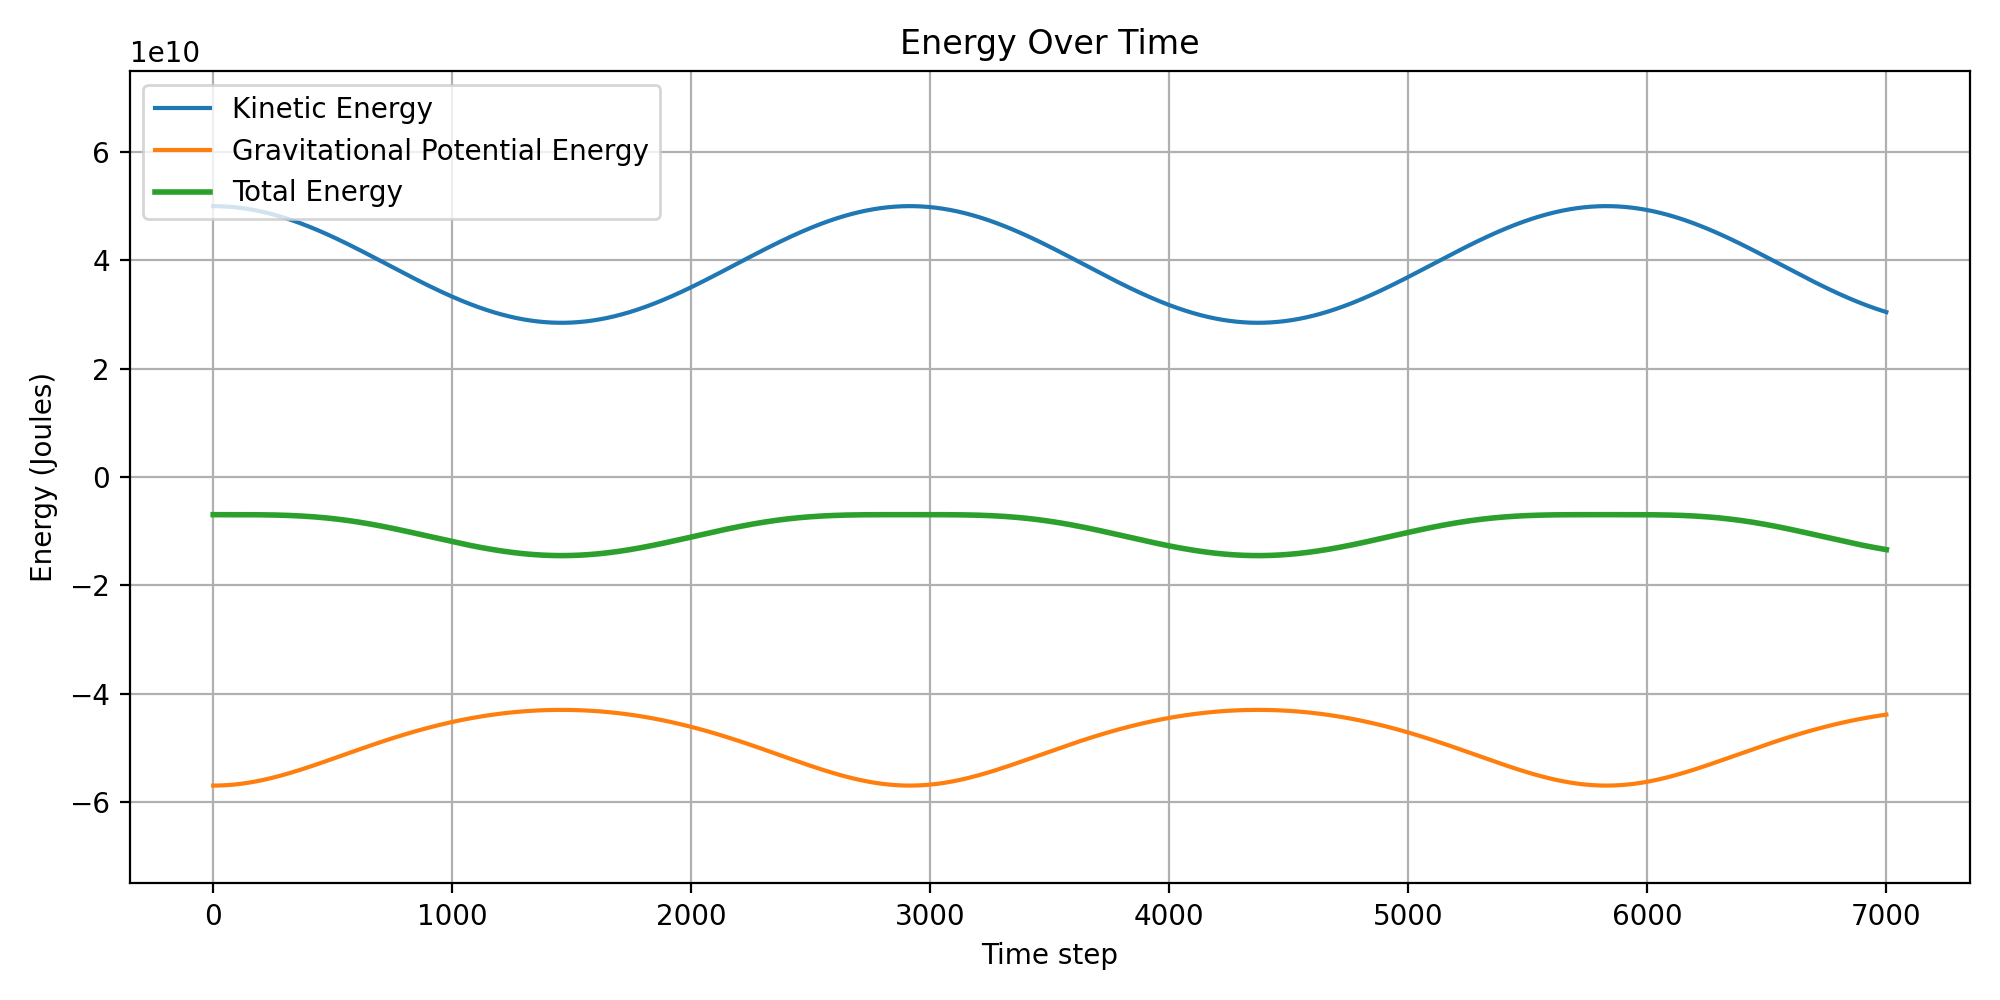

In [28]:
r_magnitudes = np.sqrt(positions[:, 0]**2 + positions[:, 1]**2) # finding r magnitudes

KE = 1/2 * mass_satellite * speeds**2
GPE = -(G * mass_satellite * mass_earth) / r_magnitudes
E_tot = KE + GPE

time = np.arange(0, total_time + dt, dt)

plt.figure(figsize=(10,5))

plt.plot(time, KE, label='Kinetic Energy')
plt.plot(time, GPE, label='Gravitational Potential Energy')
plt.plot(time, E_tot, label='Total Energy', linewidth=2)

plt.ylim(-0.75e11, 0.75e11)

plt.xlabel("Time step")
plt.ylabel("Energy (Joules)")
plt.title("Energy Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



We get a more curved line for the total energy than we'd like - it's expected, with energy consrvation, for it to be horizontal. But Euler's method tends to over and underestimate the total energy, as we've broken down the orbit into lots of small straight lines in our integration method - treating the acceleration as constant in an outdated direction. 

<IPython.core.display.Javascript object>


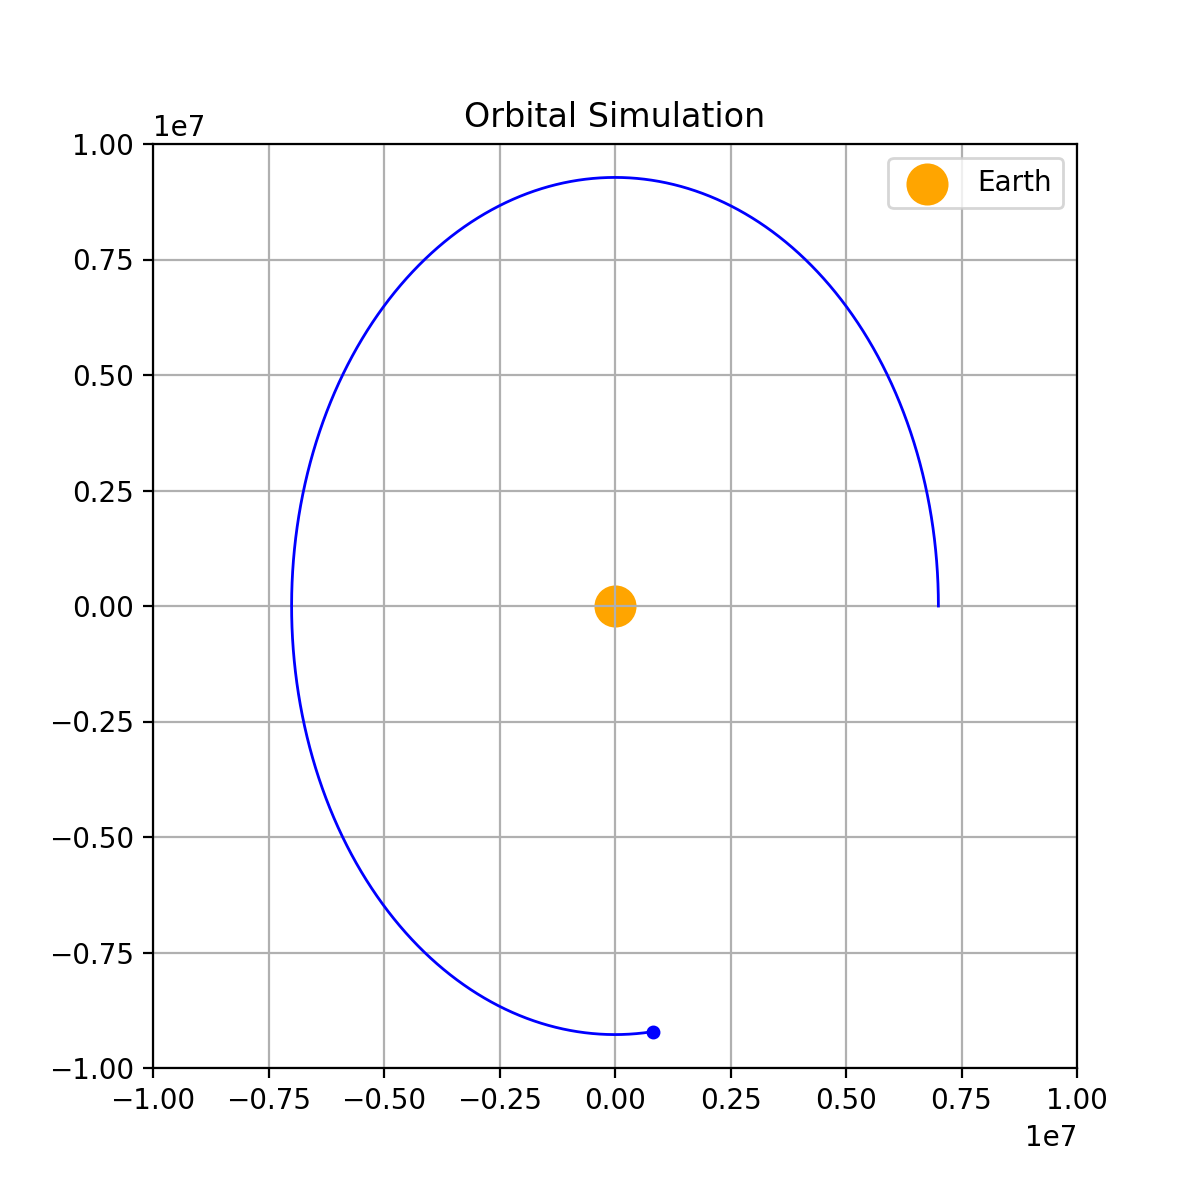

In [29]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(6, 6)) # set up figure and axes
ax.set_xlim(-1e7, 1e7) # x bounds
ax.set_ylim(-1e7, 1e7) # y bounds
ax.set_aspect('equal') # 1 unit of x maps onto 1 unit of y, otehrwise a circle would look stretched

earth = ax.scatter(0, 0, color='orange', s=200, label="Earth") # adding static element at center
satellite_dot, = ax.plot([], [], 'bo', markersize = 4) # comma as ax.plot returns a tuple but we expect one object, and want python unpacking that directly instead of the tuple
trail, = ax.plot([], [], 'b-', linewidth=1) # make a trail after every update of position to form a curve

# now need a function that resets the animation every time we play it. Initialization

def init():
    satellite_dot.set_data([], []) # reset satellite position to nothing
    trail.set_data([], []) # reset trail to nothing
    return satellite_dot, trail # return tuple of things that will be updated 

# now need a function to update the frame per position

def update(i):
    print(f"Frame {i}")
    x = positions[i, 0] # i decides which position we're on, 0 and 1 specify if x or y through axis selection
    y = positions[i, 1]
    
    satellite_dot.set_data(x, y) # set dot data to the new x and y 
    trail.set_data(positions[:i + 1, 0], positions[:i + 1, 1]) # add trail where each time a new position is used, the rest of the positions
    return satellite_dot, trail

frame_skip = 1000 # loads of frames so for our case taking every 1000th frame is okay 

ani = FuncAnimation(
    fig,            # the figure to animate
    update,         # the function to call each frame
    frames=range(0, len(positions), frame_skip),  # total number of frames, skipping every nth frame 
    init_func=init, # function to initialize the plot
    blit=False,      
    interval=10     # time between frames in milliseconds
)

plt.title("Orbital Simulation")
plt.legend()
plt.grid(True)
plt.show()
ani